In [ ]:
!pip install tqdm wordcloud tensorflow scikit-learn pandas seaborn pydot

In [35]:
import os
import sys
import pickle
import tqdm
from collections import Counter
import numpy as np
import pandas as pd
from wordcloud import STOPWORDS, WordCloud
from tensorflow import keras
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
import matplotlib.pyplot as plt


test_split = 0.1
validation_split = 0.1
GLOBAL_SEED = 5
num_words=80000
embeddings=256
train_dir = ".//aclImdb//train//"
test_dir = ".//aclImdb//test//"

In [8]:
import re
def clean_sentences(line):
    line = line.strip().lower()
    line=re.sub('<.*?>','',line)
    line=re.sub("isn't",'is not',line)
    line=re.sub("he's",'he is',line)
    line=re.sub("wasn't",'was not',line)
    line=re.sub("did't",'did not',line)
    line=re.sub("doesn't",'does not',line)
    line=re.sub("there's",'there is',line)
    line=re.sub("couldn't",'could not',line)
    line=re.sub("won't",'will not',line)
    line=re.sub("they're",'they are',line)
    line=re.sub("she's",'she is',line)
    line=re.sub("there's",'there is',line)
    line=re.sub("wouldn't",'would not',line)
    line=re.sub("haven't",'have not',line)
    line=re.sub("that's",'that is',line)
    line=re.sub("you've",'you have',line)
    line=re.sub("what's",'what is',line)
    line=re.sub("weren't",'were not',line)
    line=re.sub("we're",'we are',line)
    line=re.sub("hasn't",'has not',line)
    line=re.sub("you'd",'you would',line)
    line=re.sub("shouldn't",'should not',line)
    line=re.sub("let's",'let us',line)
    line=re.sub("they've",'they have',line)
    line=re.sub("you'll",'you will',line)
    line=re.sub("i'm",'i am',line)
    line=re.sub("we've",'we have',line)
    line=re.sub("it's",'it is',line)
    line=re.sub("don't",'do not',line)
    line=re.sub("that´s",'that is',line)
    line=re.sub("I´m",'I am',line)
    line=re.sub("it’s",'it is',line)
    line=re.sub("she´s",'she is',line)
    line=re.sub("he’s'",'he is',line)
    line=re.sub('I’m','I am',line)
    line=re.sub('I’d','I did',line)
    line=re.sub("he’s'",'he is',line)
    line=re.sub('there’s','there is',line)
    line=re.sub('\x97','',line)
    line=re.sub('\x84','',line)
    line=re.sub('\uf0b7','',line)
    line=re.sub('¡¨','',line)
    line=re.sub('\x95','',line)
    line=re.sub('\x8ei\x9eek','',line)
    line=re.sub('\xad','',line)

    punctuations = '@#!~?+&*[]-%._-:/£();$=><|{}^' + '''"“´”'`'''
    for p in punctuations:
        line = line.replace(p, f' {p} ')

    line=re.sub(',',' , ',line)
    line = line.replace('...', ' ... ')
    if '...' not in line:
        line = line.replace('..', ' ... ')
    return line


In [ ]:

def read_files_in_directory(directory):
    data = []
    ratings = []
    for i, file in tqdm.tqdm(enumerate(os.listdir(directory))):
        with open(os.path.join(directory, file), "r", encoding="utf8") as fp:
            text = fp.read()
            data.append(clean_sentences(text))
            ratings.append(float(file.removesuffix('.txt').split('_')[-1])/10)
    return pd.DataFrame({'review': data, 'rating': ratings, 'sentiment':(np.array(ratings)>=0.5).astype(int)})


dataset = pd.DataFrame({'review': [], 'rating': [],  'sentiment':[]})
for directory in [os.path.join(train_dir, "pos"), os.path.join(train_dir, "neg"), os.path.join(test_dir, "pos"), os.path.join(test_dir, "neg")]:
    dataset = pd.concat([dataset, read_files_in_directory(directory)], ignore_index=True)
dataset.to_csv("dataset.csv")

12500it [00:03, 3785.24it/s]
12500it [00:03, 3903.37it/s]
12500it [00:03, 3660.79it/s]
12500it [00:03, 3728.37it/s]


In [4]:
dataset = pd.read_csv('dataset.csv')
dataset.info()
dataset.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50000 non-null  int64  
 1   review      50000 non-null  object 
 2   rating      50000 non-null  float64
 3   sentiment   50000 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.5+ MB


,Unnamed: 0,review,rating,sentiment
0,0,bromwell high is a cartoon comedy . it ran at...,0.9,1.0
1,1,homelessness ( or houselessness as george car...,0.8,1.0
2,2,brilliant over - acting by lesley ann warren...,1.0,1.0


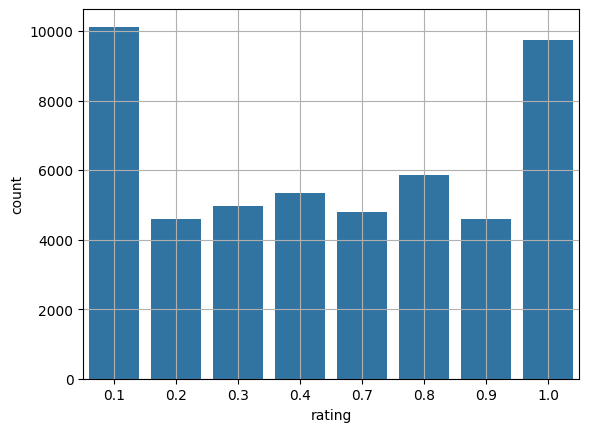

In [74]:
sns.countplot(x=dataset['rating'])
plt.grid()

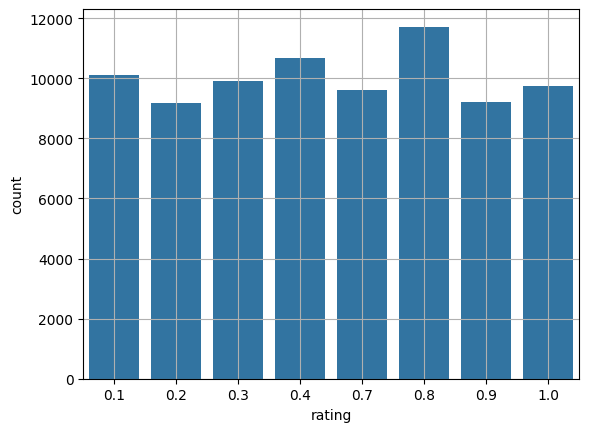

In [80]:
additional_examples = dataset.loc[(dataset['rating'] >0.1) & (dataset['rating'] < 1.0)]
dataset = pd.concat([dataset, additional_examples], ignore_index=True)
sns.countplot(x=dataset['rating'])
plt.grid()

In [81]:
sentences=dataset['review']
stopwords = set(STOPWORDS)

pos=' '.join(map(str,sentences[dataset['rating']>=.5]))
neg=' '.join(map(str,sentences[dataset['rating']<.5]))

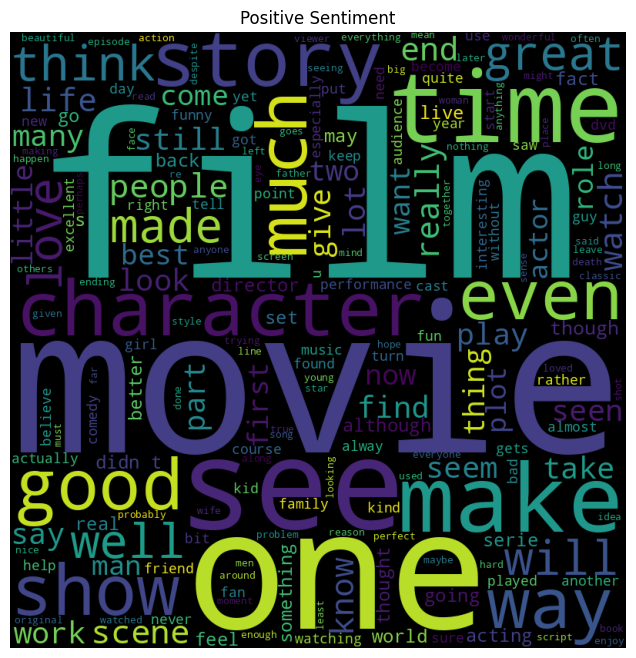

In [82]:
import matplotlib.pyplot as plt
wordcloud1 = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(pos)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.title('Positive Sentiment')
plt.axis('off')
plt.show()

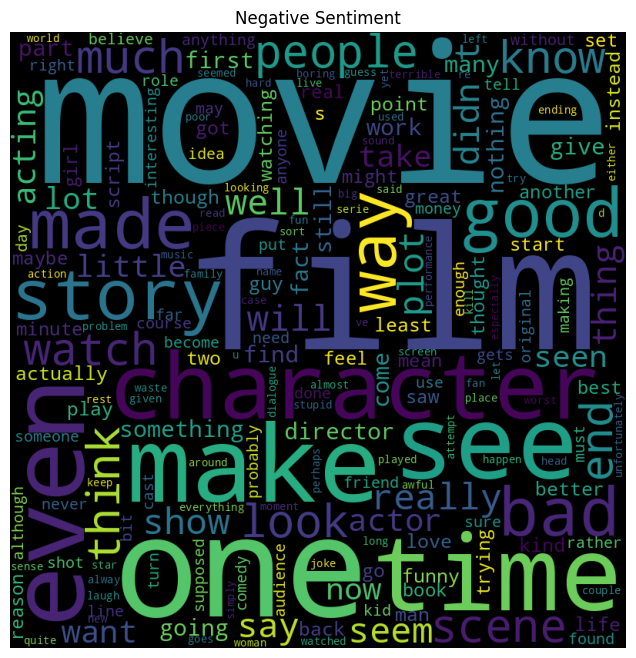

In [83]:
plt.figure(figsize=(8,8))
wordcloud2 = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(neg)

plt.imshow(wordcloud2)
plt.title('Negative Sentiment')
plt.axis('off')
plt.show()

In [84]:
X_train,X_test,Y_train,Y_test = train_test_split(dataset['review'],dataset['rating'],test_size=test_split,random_state=GLOBAL_SEED)
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size=test_split,random_state=GLOBAL_SEED)

In [7]:
def get_sentiment(y):
    return (y>=0.5).astype(int)
get_sentiment(np.array([0.2, 0.6]))
Y_train[:10], to_categorical(get_sentiment(Y_train[:10]),num_classes=2)

(47392    0.4
 775      0.9
 14955    0.4
 29394    0.7
 35014    0.8
 25818    0.9
 8835     0.8
 21233    0.1
 8680     0.7
 34727    0.9
 Name: rating, dtype: float64,
 array([[1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.]]))

In [85]:
tokenizer=Tokenizer(num_words=num_words,oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
word_index=tokenizer.word_index
total_vocab=len(word_index)
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
total_vocab

101550

In [45]:
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [86]:
from keras.preprocessing.sequence import pad_sequences
sequences_train=tokenizer.texts_to_sequences(X_train)
sequences_test=tokenizer.texts_to_sequences(X_test)
sequences_val=tokenizer.texts_to_sequences(X_val)

max_len=max(max([len(x) for x in sequences_train]),max([len(x) for x in sequences_val]))
print(max_len)
X_train=pad_sequences(sequences_train,maxlen=max_len)
X_test=pad_sequences(sequences_test,maxlen=max_len)
X_val=pad_sequences(sequences_val,maxlen=max_len)

2525


In [89]:
from tensorflow.keras.models import Model
from keras.layers import Embedding,Conv1D,LSTM,GRU,BatchNormalization,Flatten,Dense, Input
inputs = Input(shape=(max_len,))
x = Embedding(num_words,embeddings, input_shape=(max_len,))(inputs)
x = Conv1D(256,10,activation='relu')(x)
x = keras.layers.Bidirectional(LSTM(128,return_sequences=True))(x)
x = LSTM(64)(x)
x = keras.layers.Dropout(0.4)(x)
x1 = Dense(10, activation='relu')(x)
o1 = Dense(1, name= 'o1')(x1)
o2 = Dense(2,activation='softmax', name= 'o2')(x)
multioutput_model = Model(inputs=inputs, outputs=[o1, o2])

In [24]:
def rating_acc(y_true, y_pred):
    return np.sum(y_true==np.round(y_pred, 1))/y_true.shape[0]

rating_acc(np.array([0.2, 0.6]), np.array([0.22, 0.36]))

In [90]:
multioutput_model.compile(optimizer='adam',
              loss = {'o2' : 'binary_crossentropy',
                      'o1' : 'mse'
                     },
              metrics = {'o2' : 'accuracy',
                         'o1': tf.keras.metrics.RootMeanSquaredError()
                       }
             )

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 2525)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_6 (Embedding)   │ (None, 2525, 256)      │     20,480,000 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_6 (Conv1D)         │ (None, 2516, 256)      │        655,616 │ embedding_6[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_6           │ (None, 2516, 256)      │        394,240 │ conv1d_6[0][0]         │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_13 (LSTM)            │ (None, 64)             │         82,176 │ bidirectional_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_6 (Dropout)       │ (None, 64)             │              0 │ lstm_13[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 10)             │            650 │ dropout_6[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ o1 (Dense)                │ (None, 1)              │             11 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ o2 (Dense)                │ (None, 2)              │            130 │ dropout_6[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 21,612,823 (82.45 MB)

 Trainable params: 21,612,823 (82.45 MB)

 Non-trainable params: 0 (0.00 B)

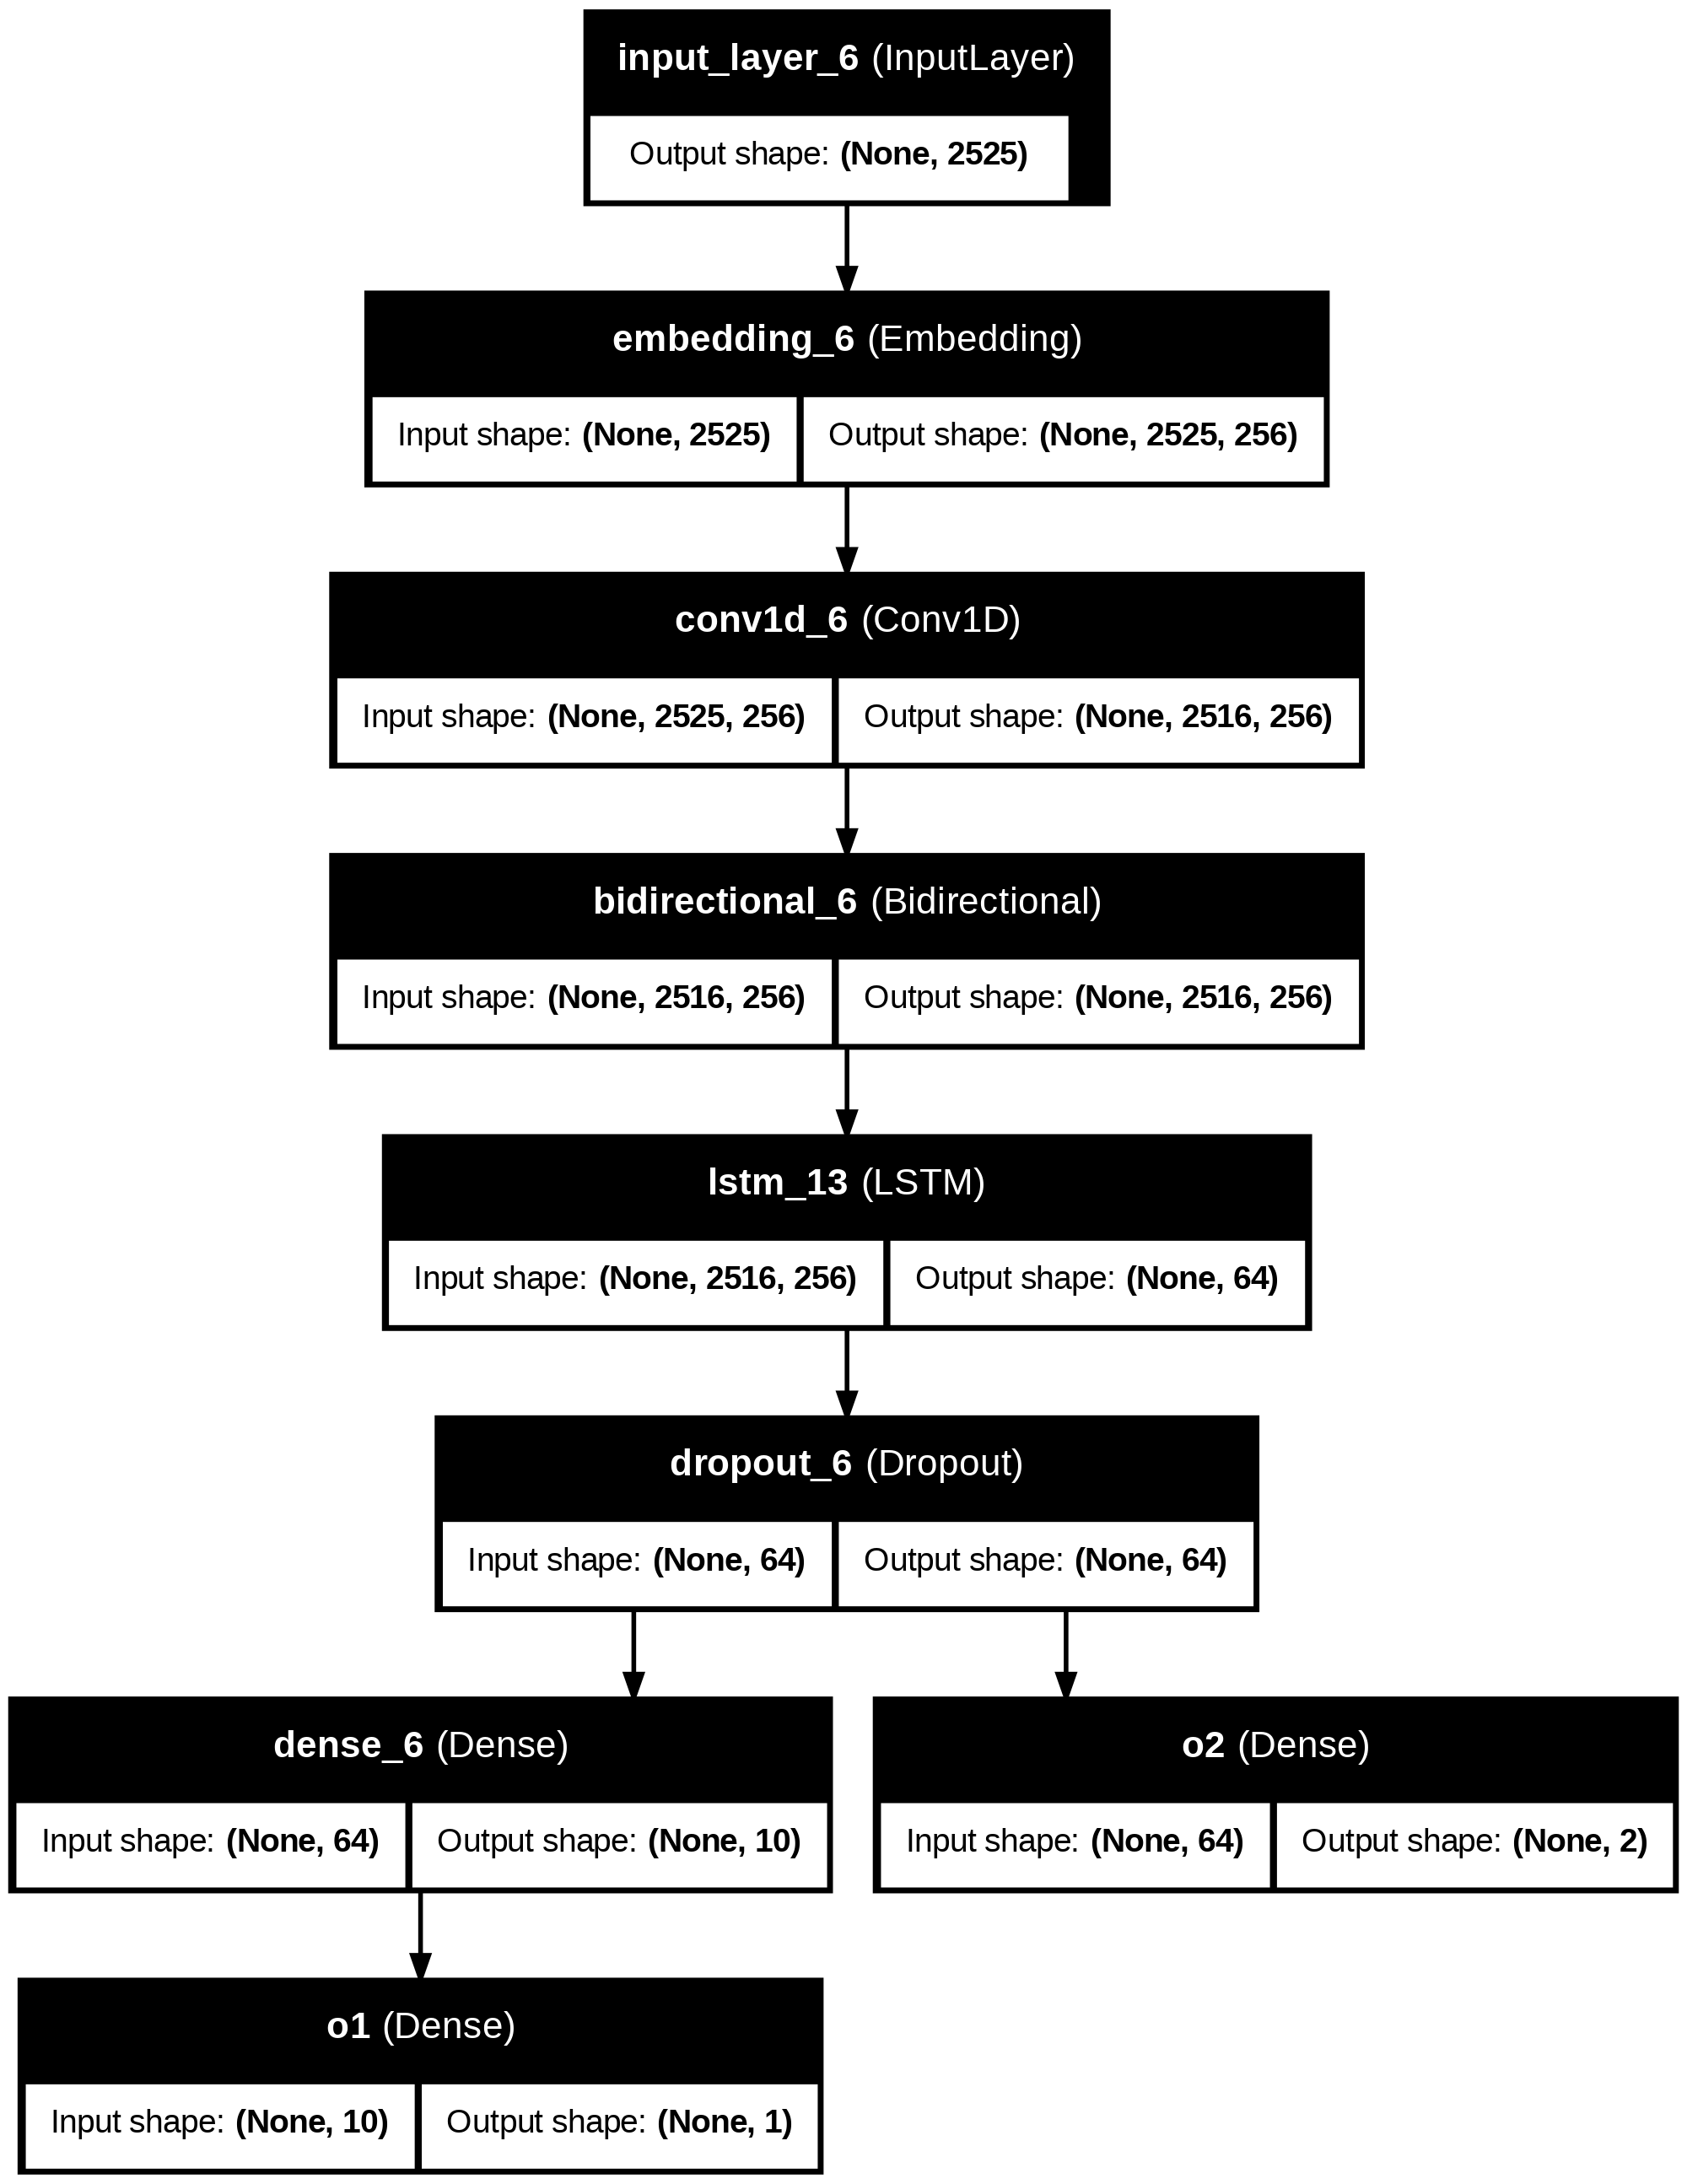

In [91]:
multioutput_model.summary()
tf.keras.utils.plot_model(multioutput_model, show_shapes=True, show_layer_names=True)

In [43]:
from tensorflow.python.client import device_lib;print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9716504328211708485
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1684784856568555538
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [92]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
es= EarlyStopping(monitor='val_o2_accuracy',
                  patience=1,
                  mode='max'
                 )

checkpoints=ModelCheckpoint(filepath='./checkpoint.keras',
                            monitor="val_o2_accuracy",
                            verbose=0,
                            save_best_only=True
                           )
callbacks=[es,checkpoints]
history=multioutput_model.fit(X_train,{'o1': Y_train, 'o2' : to_categorical(get_sentiment(Y_train),num_classes=2)},validation_data=(X_val, {'o1': Y_val, 'o2' : to_categorical(get_sentiment(Y_val),num_classes=2)}),epochs=5,callbacks=callbacks)

Epoch 1/5
2029/2029 ━━━━━━━━━━━━━━━━━━━━ 740s 363ms/step - loss: 0.5403 - o1_root_mean_squared_error: 0.2774 - o2_accuracy: 0.7686 - val_loss: 0.2775 - val_o1_root_mean_squared_error: 0.1837 - val_o2_accuracy: 0.9098
Epoch 2/5
2029/2029 ━━━━━━━━━━━━━━━━━━━━ 749s 367ms/step - loss: 0.1709 - o1_root_mean_squared_error: 0.1621 - o2_accuracy: 0.9496 - val_loss: 0.1817 - val_o1_root_mean_squared_error: 0.1613 - val_o2_accuracy: 0.9476
Epoch 3/5
2029/2029 ━━━━━━━━━━━━━━━━━━━━ 791s 362ms/step - loss: 0.0598 - o1_root_mean_squared_error: 0.1278 - o2_accuracy: 0.9870 - val_loss: 0.2126 - val_o1_root_mean_squared_error: 0.1597 - val_o2_accuracy: 0.9523
Epoch 4/5
2029/2029 ━━━━━━━━━━━━━━━━━━━━ 743s 362ms/step - loss: 0.0349 - o1_root_mean_squared_error: 0.1190 - o2_accuracy: 0.9939 - val_loss: 0.1878 - val_o1_root_mean_squared_error: 0.1576 - val_o2_accuracy: 0.9569
Epoch 5/5
2029/2029 ━━━━━━━━━━━━━━━━━━━━ 735s 359ms/step - loss: 0.0314 - o1_root_mean_squared_error: 0.1165 - o2_accuracy: 0.9940 -

In [58]:
multioutput_model.load_weights('./checkpoint.keras')

In [93]:
multioutput_model.evaluate(X_test,{'o1': Y_test, 'o2' : to_categorical(get_sentiment(Y_test),num_classes=2)})
multioutput_model.save('./caselabs_model.keras')

251/251 ━━━━━━━━━━━━━━━━━━━━ 34s 136ms/step - loss: 0.1669 - o1_root_mean_squared_error: 0.1503 - o2_accuracy: 0.9659


In [14]:
from tensorflow.keras.models import Model
import tensorflow
from tensorflow.keras.layers import Embedding,Conv1D,LSTM,GRU,BatchNormalization,Flatten,Dense, Input
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import re

with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)
MAX_LEN = 2525
model = tensorflow.keras.models.load_model('./caselabs_model.keras')

def evaluate_text(text, tokenizer, model):
  text = [clean_sentences(text)]
  text = pad_sequences(tokenizer.texts_to_sequences(text),maxlen=MAX_LEN)
  output = model.predict(text)
  rating = round(output[0][0][0]*10)
  sentiment = output[1][0].argmax()
  return rating, sentiment



In [13]:
texts = [
    "the film is quite good, I can recommend it for viewing, but it is clearly not a masterpiece. It has some problems",
    "oh my god i laughed so hard it's the best film ever!!! I definitely recommend it, this is a masterpiece! This is the best thing I have seen in a long time. ",
    "frankly speaking it's a pity for the time spent, stupid piece of stupid shit. A boring, dull movie with a predictable plot and terrible acting",
    "Well, it'll do, but it's clearly below average. There are few good things, i liked actor A, but others...",
    "just normal. The acting is more or less good, the plot is nothing surprising, a normal movie. Actor A is good, actor B plays average, and actor C... It's obvious that he's a newbie"
    ]

for t in texts:
  print(evaluate_text(t, tokenizer, model))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step
(8, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
(9, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
(2, 0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
(3, 0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
(7, 1)


In [15]:
text = "the film is good, of course, but oh, this tolerance agenda. Why is the main character black? In the book she was completely different. Also, there was romance between the secondary characters of the same sex. Is it really impossible to make a normal film without all this vulgarity?"
print(evaluate_text(text, tokenizer, model))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
(3, 0)
